# <center> PHẦN 2. KHÁM PHÁ DỮ LIỆU & ĐẶT CÂU HỎI

# Tổng quan về tiền xử lý dữ liệu
Mục tiêu chính:
## A. Làm sạch dữ liệu (Exploratory Data Analysis - EDA):
1. Khám phá dữ liệu: Đưa ra những đánh giá đầu tiên về dữ liệu để hiểu cấu trúc và ý nghĩa của chúng.
Trước khi xử lý, chúng ta cần hiểu rõ cấu trúc và nội dung của dữ liệu. Các hoạt động bao gồm:

+ Kiểm tra số lượng dòng, cột.
Xác định kiểu dữ liệu của từng cột (số, phân loại, ngày tháng, ...).
+ Kiểm tra tỷ lệ dữ liệu bị thiếu, các giá trị bất thường.
+ Tóm tắt các thống kê cơ bản như trung bình, giá trị nhỏ nhất/lớn nhất, phương sai, ...

(Bước này làm giống format HW2)

2. Xử lý dữ liệu thiếu  (Handling Missing Data):
Dữ liệu thiếu thường gây sai lệch trong phân tích. Chúng ta sẽ điền giá trị bị thiếu bằng các phương pháp như:
+ Giá trị trung bình/median.
+ Thuật toán Machine Learning. Ae chú ý là cần áp dụng đúng model, ví dụ như đối với kiểu dữ liệu là Category (phân lớp) thì nên sử dụng KNN, hoặc int64 (Liên tục) thì xài Linear Regression,....
+ Hoặc loại bỏ các dòng/cột chứa quá nhiều giá trị bị thiếu nếu cần thiết.

3. Xử lý dữ liệu nhiễu: Loại bỏ các giá trị bất thường (outliers) để đảm bảo dữ liệu sạch (Sử dụng  phương pháp như IQR (Interquartile Range) để phát hiện và loại bỏ những giá trị nằm ngoài phạm vi hợp lý.)

4. Chuẩn hóa kiểu dữ liệu:
- Chuyển đổi dữ liệu về đúng kiểu cần thiết (ví dụ: chuyển đổi ngày tháng, số nguyên, số thực).
- Mã hóa dữ liệu phân loại (categorical data) thành dạng số, phù hợp với mô hình (Label Encoding hoặc One-hot Encoding). (nếu cảm thấy cần thiết)
P/s: Thứ tự các bước trên có thể thay đổi, tùy theo ae thiết kế


## B. Giảm chiều dữ liệu(Dimensionality Reduction): Giảm độ phức tạp
1..Khám phá dữ liệu (Tiếp theo):
- Trực quan hóa mối quan hệ giữa các biến để xác định những biến dư thừa, không cần thiết.
- Sử dụng ma trận tương quan (Correlation Matrix) để xem xét độ tương quan giữa các biến:
  - Loại bỏ các biến có độ tương quan cao (vì có thể gây trùng lặp thông tin).
  - Giữ lại các biến quan trọng nhất để giảm độ phức tạp và tăng hiệu quả phân tích.

## C. Chuẩn hóa dữ liệu (Nếu còn thời gian)
- Min-Max Scaling: Đưa dữ liệu về khoảng [0, 1].
- Z-score Standardization: Chuẩn hóa dữ liệu thành phân phối chuẩn với trung bình bằng 0 và phương sai bằng 1.
- Robust Scaling: Loại bỏ tác động của các giá trị ngoại lai khi chuẩn hóa.
- Decimal Scaling: Chia giá trị cho lũy thừa của 10 để thu hẹp giá trị dữ liệu.

## D. Rời rạc hóa dữ liệu (Tìm hiểu thêm)

## E. Lưu dữ liệu sạch: Dữ liệu sau khi tiền xử lý sẽ được lưu lại để sử dụng trong các giai đoạn phân tích tiếp theo.

# Import các thư viện cần thiết


In [1]:
import requests
import json
import pandas as pd
import numpy as np
import time
import datetime
import calendar
import seaborn as sns
import matplotlib.pyplot as plt

## A.1. Khám phá dữ liệu

**Đọc file dữ liệu ban đầu chưa xử lí từ raw_data**

In [2]:
raw_team_profile_data = pd.read_csv('./data/raw_data/team_profile.csv', delimiter='\t')
raw_team_profile_data.head()

,Season,Club,Squad,Average age,Foreigners,Average market value,Total market value
0,14/15,Chelsea FC,38.0,25.4,28.0,€14.66m,€557.25m
1,14/15,Manchester United,43.0,25.4,26.0,€11.75m,€505.40m
2,14/15,Manchester City,34.0,27.1,27.0,€13.18m,€448.25m
3,14/15,Arsenal FC,42.0,24.5,29.0,€9.88m,€414.75m
4,14/15,Liverpool FC,35.0,24.8,21.0,€9.28m,€324.85m


**Dữ liệu có bao nhiêu hàng, bao nhiêu cột?**

In [3]:
row, col = raw_team_profile_data.shape
print(f'Số dòng: {row}')
print(f'Số cột: {col}')

Số dòng: 200
Số cột: 7


**Dữ liệu các dòng có bị lặp không?**

In [4]:
duplicates = raw_team_profile_data.duplicated()
print(f"Số dòng bị lặp: {duplicates.sum()}")

Số dòng bị lặp: 0


### Ý nghĩa của các cột dữ liệu

1. `Season`: Mùa giải mà dữ liệu được ghi nhận.
2. `Club`: Tên của câu lạc bộ bóng đá.
3. `Squad`: Số lượng cầu thủ trong đội hình của câu lạc bộ.
4. `Average age`: Tuổi trung bình của các cầu thủ trong đội.
5. `Foreigners`: Số lượng cầu thủ nước ngoài trong đội hình.
6. `Average market value`: Giá trị thị trường trung bình của các cầu thủ trong đội.
7. `Total market value`: Tổng giá trị thị trường của tất cả cầu thủ trong đội bóng.

In [5]:
dtypes = raw_team_profile_data.dtypes
dtypes

Season                   object
Club                     object
Squad                   float64
Average age             float64
Foreigners              float64
Average market value     object
Total market value       object
dtype: object

### Chuẩn hóa dữ liệu và kiểu dữ liệu

- Hiện tại, hai cột `Average market value` và `Total market value` đang có kiểu dữ liệu là object thay vì kiểu dữ liệu số, điều này không phù hợp với mục đích phân tích và tính toán. Cả hai cột này thực tế nên là các kiểu dữ liệu số (float) để có thể thực hiện các phép toán như cộng, trừ, hoặc phân tích thống kê.

- Để chuyển đổi chúng về kiểu dữ liệu số, ta cần loại bỏ đơn vị tiền tệ ("€", "m", "bn") và chuyển đổi giá trị về cùng một mức giá, vì vậy thực hiện chuyển đổi đơn vị tiền tệ sang triệu euro (m) từ các cột có mức giá (bn).

In [6]:
def convert_market_value(value):
    value = value.replace('€', '').strip()
    
    if 'bn' in value:
        value = value.replace('bn', '').strip()
        value = float(value) * 1000  
    elif 'm' in value:
        value = value.replace('m', '').strip()  
        value = float(value) 
        
    return value    

In [7]:
raw_team_profile_data['Average market value'] = raw_team_profile_data['Average market value'].apply(convert_market_value)
raw_team_profile_data['Total market value'] = raw_team_profile_data['Total market value'].apply(convert_market_value)

In [8]:
# kiểm tra lại kiểu dữ liệu
raw_team_profile_data.dtypes

Season                   object
Club                     object
Squad                   float64
Average age             float64
Foreigners              float64
Average market value    float64
Total market value      float64
dtype: object

In [9]:
raw_team_profile_data.head()

,Season,Club,Squad,Average age,Foreigners,Average market value,Total market value
0,14/15,Chelsea FC,38.0,25.4,28.0,14.66,557.25
1,14/15,Manchester United,43.0,25.4,26.0,11.75,505.40
2,14/15,Manchester City,34.0,27.1,27.0,13.18,448.25
3,14/15,Arsenal FC,42.0,24.5,29.0,9.88,414.75
4,14/15,Liverpool FC,35.0,24.8,21.0,9.28,324.85


### Kiểm tra sự phân bố của dữ liệu trên các cột dữ liệu dạng số

**Đầu tiên, kiểm tra xem có dữ liệu nào không hợp lệ không, giá trị của các dữ liệu dạng số phải lớn hơn hoặc bằng 0.**

In [10]:
numeric_cols_df = raw_team_profile_data.select_dtypes(include=['number'])

for column in numeric_cols_df.columns:
    invalid_values = raw_team_profile_data[raw_team_profile_data[column] < 0]
    if not invalid_values.empty:
        print(f"Invalid values in column '{column}':")
        print(invalid_values[[column]])
    else:
        print(f"No invalid values in column '{column}'.")

No invalid values in column 'Squad'.
No invalid values in column 'Average age'.
No invalid values in column 'Foreigners'.
No invalid values in column 'Average market value'.
No invalid values in column 'Total market value'.


Như vậy không có giá trị không hợp lệ ở các cột dữ liệu dạng số.

**Tiếp theo, ta sẽ xem xét sự phân bố của dữ liệu trong các cột dữ liệu dạng số này.**

Đối với các cột có kiểu dữ liệu số, ta sẽ tính toán các giá trị sau:
- Tỷ lệ phần trăm (từ 0 đến 100) của các giá trị thiếu
- Giá trị nhỏ nhất (min)
- Tứ phân vị thứ nhất (lower quartile)
- Trung vị (median)
- Tứ phân vị thứ ba (upper quartile)
- Giá trị lớn nhất (max)

In [11]:
numeric_cols_df = raw_team_profile_data.select_dtypes(include=['number'])

def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)

def median(df):
    return (df.quantile(0.5)).round(1)

def lower_quartile(df):
    return (df.quantile(0.25)).round(1)

def upper_quartile(df):
    return (df.quantile(0.75)).round(1)

num_team_profile_col_info_df = numeric_cols_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_team_profile_col_info_df

,Squad,Average age,Foreigners,Average market value,Total market value
missing_ratio,4.0,1.0,2.0,0.00,0.00
min,29.0,22.2,11.0,1.75,52.55
lower_quartile,35.8,25.1,21.0,4.70,185.20
median,39.0,25.8,24.0,8.20,316.00
upper_quartile,43.0,26.6,27.0,13.60,541.70
max,56.0,28.6,41.0,40.63,1460.00


### Kiểm tra sự phân bố của dữ liệu trên các cột dữ liệu phân loại

Đối với các cột phân loại, ta sẽ tính toán các giá trị sau:

- Tỷ lệ phần trăm các giá trị thiếu (Missing Ratio): Tính toán tỷ lệ phần trăm của các giá trị bị thiếu trong cột.
  
- Số lượng giá trị khác nhau (Number of Unique Values): Đếm số lượng các giá trị duy nhất trong cột, không bao gồm các giá trị thiếu.

- Tỷ lệ phần trăm của từng giá trị (Value Ratios): Tính tỷ lệ phần trăm xuất hiện của từng giá trị trong cột, không tính các giá trị thiếu. Tỷ lệ được tính trên tổng số giá trị không thiếu trong cột.

In [12]:
def value_ratios(s):
    total_count = s.notna().sum()  
    ratios = (s.value_counts(dropna=True) / total_count * 100).round(1)  
    return ratios.to_dict()

def num_values(s):
    return s.value_counts().count()

cat_team_profile_col_info_cols = raw_team_profile_data.select_dtypes(include='object')
cat_team_profile_col_info_df = cat_team_profile_col_info_cols.agg([missing_ratio, num_values, value_ratios]) 
cat_team_profile_col_info_df

,Season,Club
missing_ratio,0.0,0.0
num_values,10,34
value_ratios,"{'14/15': 10.0, '15/16': 10.0, '16/17': 10.0, ...","{'Chelsea FC': 5.0, 'Manchester United': 5.0, ..."


Dữ liệu phân loại đã được phân bổ đúng theo yêu cầu, đảm bảo phù hợp với mục đích phân tích.

### A.2.Xử lý dữ liệu thiếu



**Đầu tiên, xem lại tỉ lệ dữ liệu bị thiếu của các cột**

In [13]:
dict(num_team_profile_col_info_df.iloc[0])

{'Squad': np.float64(4.0),
 'Average age': np.float64(1.0),
 'Foreigners': np.float64(2.0),
 'Average market value': np.float64(0.0),
 'Total market value': np.float64(0.0)}

Sau khi phân tích tỷ lệ phần trăm các dữ liệu thiếu của các cột, nhận thấy rằng tỷ lệ này rất thấp, do đó không cần phải loại bỏ các cột có dữ liệu thiếu. Thay vào đó, tiến hành điền các giá trị thiếu này để duy trì tính đầy đủ và chính xác của bộ dữ liệu.

**Điền dữ liệu cho các cột bị thiếu**

Dữ liệu bị thiếu ở 3 cột: `Squad`, `Average age`, `Foreigners`
- Đối với cột `Squad`: dựa theo ý nghĩa của từng cột trong dữ liệu, giá trị này của một đội có thể được tính bằng cách lấy dữ liệu của cột `Total market value` chia cho `Average market value` tương ứng trong dòng đó. (`Average market value` = `Total market value` x `Squad`)
- Với cột `Average age`: ta sẽ điền bằng cách lấy trung bình số tuổi trung bình của đội bóng đó của 2 mùa giải trước đó và sau đó. 
- Với cột `Freigners`: tương tự như cột Average age, ta sẽ điền bằng cách lấy trung bình số lượng cầu thủ ngoại quốc của đội bóng đó của 2 mùa giải trước đó và sau đó. 
- Trường hợp nếu dữ liệu bị thiếu nằm ở mùa đầu tiên (cuối cùng) của dữ liệu, ta sẽ điền bằng cách lấy dữ liệu ứng với mùa sau đó (trước đó).

In [14]:
def fill_missing_by_adjacent_seasons(df, column):
    for index, row in df[df[column].isnull()].iterrows():
        
        season = row['Season'] # lấy mùa giải của dòng có dữ liệu bị thiếu
        club = row['Club'] # lấy tên đội bóng có dữ liệu bị thiếu
        
        # tìm mùa giải trước và sau
        prev_season = str(int(season.split('/')[0])-1) + '/' + str(int(season.split('/')[1])-1)
        next_season = str(int(season.split('/')[0])+1) + '/' + str(int(season.split('/')[1])+1)
        
        # tìm giá trị trong cột của mùa giải trước và sau cho cùng một câu lạc bộ
        prev_value = df[(df['Season'] == prev_season) & (df['Club'] == club)][column]
        next_value = df[(df['Season'] == next_season) & (df['Club'] == club)][column]
        
        if not prev_value.empty and not next_value.empty: # điền trung bình vào
            if column == 'Foreigners':  # nếu là cột 'Foreigners', ta sẽ làm tròn giá trị
                df.at[index, column] = int((prev_value.values[0] + next_value.values[0]) / 2)
            else:
                df.at[index, column] = (prev_value.values[0] + next_value.values[0]) / 2
        elif prev_value.empty and not next_value.empty:
            df.at[index, column] = next_value.values[0]
        elif not prev_value.empty and next_value.empty:
            df.at[index, column] = prev_value.values[0]
            
    return df

# điền giá trị thiếu cho cột 'Squad'
raw_team_profile_data['Squad'] = raw_team_profile_data['Squad'].fillna(
    (raw_team_profile_data['Total market value'] / raw_team_profile_data['Average market value']).round().astype(int)
)

# điền giá trị thiếu cho các cột 'Squad', 'Average age', và 'Foreigners'
raw_team_profile_data = fill_missing_by_adjacent_seasons(raw_team_profile_data, 'Average age')
raw_team_profile_data = fill_missing_by_adjacent_seasons(raw_team_profile_data, 'Foreigners')

**Kiểm tra lại phân bố của dữ liệu sau khi đã điền các giá trị bị thiếu**

In [15]:
raw_team_profile_data.select_dtypes(exclude='object').agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,Squad,Average age,Foreigners,Average market value,Total market value
missing_ratio,0.0,0.0,0.0,0.00,0.00
min,29.0,22.2,11.0,1.75,52.55
lower_quartile,35.8,25.1,21.0,4.70,185.20
median,39.0,25.8,24.0,8.20,316.00
upper_quartile,43.0,26.6,27.0,13.60,541.70
max,56.0,28.6,41.0,40.63,1460.00


## B. Giảm độ phức tạp dữ liệu

**Đầu tiên, ta sẽ xem xét sự ảnh hưởng lẫn nhau của các cột dữ liệu bằng ma trận tương quan**

In [16]:
correlation_matrix = raw_team_profile_data.select_dtypes(exclude='object').corr()

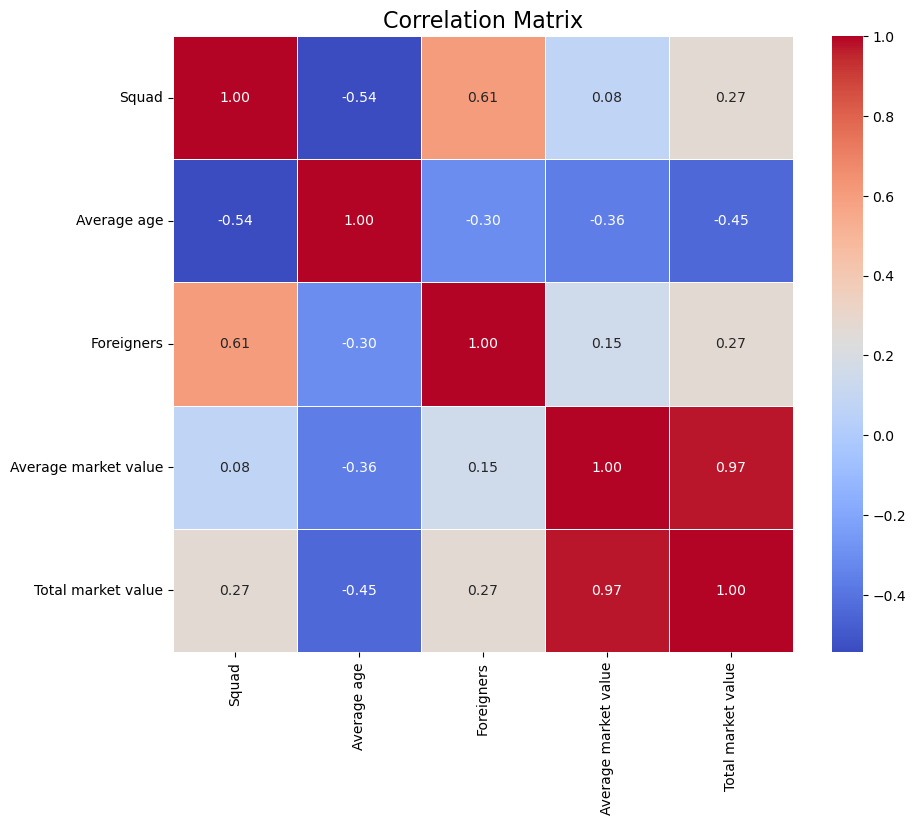

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

**Nhận xét**

- Dựa vào biểu đồ, có thể thấy dữ liệu của cột `Average market value` và 	`Total market value` có độ tương quan thuận vô cùng mạnh với nhau với hệ số tương quan là 0.97.

- `Average market value` là giá trị trung bình của các cầu thủ trong đội bóng, trong khi `Total market value` là tổng giá trị của tất cả các cầu thủ. Mối quan hệ mạnh mẽ giữa chúng có thể được giải thích bằng cách Total market value chính là kết quả của phép toán nhân giữa Average market value và số lượng cầu thủ trong đội (cột Squad) như đã nhận xét ở trên.

**Nhóm em quyết định loại bỏ cột `Average market value` ở tập dữ liệu này vì những lí do sau**

- Vì `Average market value` và `Total market value` không mang thêm giá trị thông tin độc lập, vì giá trị của nó có thể được tính toán lẫn nhau thông qua giá trị của `Squad`.

- **Và mục tiêu của nhóm em là nghiên cứu về thông tin giá trị tổng thể của đội bóng**, thì cột `Total market value` sẽ hữu ích hơn, vì nó cung cấp thông tin về giá trị tổng thể của đội bóng, đặc biệt khi muốn phân tích về tình trạng tài chính hay mức độ đầu tư vào các đội bóng.

- Vì vậy, việc loại bỏ cột `Average market value` thay vì `Total market value`, giúp giữ lại cột chứa thông tin tổng thể và giảm sự dư thừa trong bộ dữ liệu, đồng thời giúp quá trình phân tích trở nên dễ dàng hơn mà không mất đi thông tin quan trọng.

In [18]:
# loại bỏ cột 'Average market value'
raw_team_profile_data = raw_team_profile_data.drop(columns=['Average market value'])
raw_team_profile_data.head()

,Season,Club,Squad,Average age,Foreigners,Total market value
0,14/15,Chelsea FC,38.0,25.4,28.0,557.25
1,14/15,Manchester United,43.0,25.4,26.0,505.40
2,14/15,Manchester City,34.0,27.1,27.0,448.25
3,14/15,Arsenal FC,42.0,24.5,29.0,414.75
4,14/15,Liverpool FC,35.0,24.8,21.0,324.85


**Lưu dữ liệu sau khi xử lí**

In [19]:
raw_team_profile_data.to_csv('./data/clean_data/team_profile.csv', sep='\t', encoding='utf-8', index=False, header=True)